Analysis of a pharmacy sales

In [ ]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import file from location path

_csv_read_file_path=pd.read_csv(r'C:\Users\val-c\Desktop\COURSERA DATASHEET\Pharmacy Data.csv')

#display datasets
_csv_read_file_path.head (7)

#display now of rows and columns
#_csv_read_file_path.shape 

,Store Number,Average Daily Customers,Average Daily Splashtastic Sales (Units),Average Daily Splashtastic Sales (Dollars),Average Total Daily Sales (All Products)
0,1,120,6.0,$25.02,"$2,686.00"
1,2,144,18.0,$75.06,"$4,291.00"
2,3,394,13.0,$54.21,"$5,168.00"
3,4,122,17.0,$70.89,"$2,844.00"
4,5,132,3.0,$12.51,"$3,241.00"
5,6,140,10.0,$41.70,"$3,865.00"
6,7,139,4.0,$16.68,"$3,772.00"


In [3]:
#check for duplicates

_dupl=_csv_read_file_path.duplicated().sum()
print ('duplicate(s) =',_dupl)

duplicate(s) = 0


In [4]:
#calculate the existing NaN/missing values in the datasets

_csv_read_file_path.isna().sum().to_frame('Total')

,Total
Store Number,0
Average Daily Customers,0
Average Daily Splashtastic Sales (Units),1
Average Daily Splashtastic Sales (Dollars),1
Average Total Daily Sales (All Products),0


In [5]:
#drop NaN / missings values

_csv_read_file_path.dropna(inplace=True)

In [6]:
#reconfirm the dropped NaN 

_csv_read_file_path.notna().sum()

Store Number                                  37
Average Daily Customers                       37
Average Daily Splashtastic Sales (Units)      37
Average Daily Splashtastic Sales (Dollars)    37
Average Total Daily Sales (All Products)      37
dtype: int64

In [7]:
#display data types for the dataframe

_csv_read_file_path.dtypes

Store Number                                    int64
Average Daily Customers                         int64
Average Daily Splashtastic Sales (Units)      float64
Average Daily Splashtastic Sales (Dollars)     object
Average Total Daily Sales (All Products)       object
dtype: object

In [8]:
#tranform the object values to float,to enable calculations further

_csv_read_file_path[_csv_read_file_path.columns[3:]] = _csv_read_file_path[_csv_read_file_path.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
print(_csv_read_file_path.dtypes)

Store Number                                    int64
Average Daily Customers                         int64
Average Daily Splashtastic Sales (Units)      float64
Average Daily Splashtastic Sales (Dollars)    float64
Average Total Daily Sales (All Products)      float64
dtype: object


In [9]:
#calculate the total average daily customers, the Average Daily Splashtastic Sales (Dollars) and (units) from all the stores
totl_costmr=_csv_read_file_path['Average Daily Customers'].sum()
totl_sales=_csv_read_file_path['Average Daily Splashtastic Sales (Dollars)'].sum()
totl_sales_units=_csv_read_file_path['Average Daily Splashtastic Sales (Units)'].sum()

#print calculations
print('Total of average daily costumers is=',  totl_costmr)
print('Total of average daily splashtastic sales (dollars) is =',  totl_sales.astype(int))
print('Total of average daily splashtastic sales (units) is =',  totl_sales_units.astype(int))

Total of average daily costumers is= 8111
Total of average daily splashtastic sales (dollars) is = 1743
Total of average daily splashtastic sales (units) is = 418


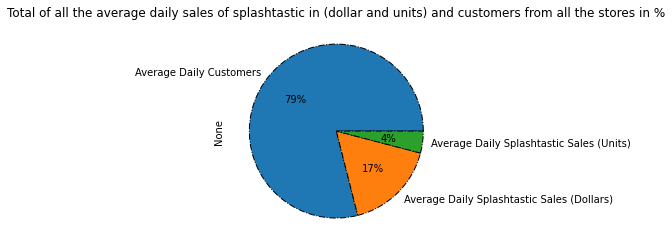

In [10]:
# a pie chart to have the visuals of the above calcualted data

_csv_read_file_path[['Average Daily Customers','Average Daily Splashtastic Sales (Dollars)',
                     'Average Daily Splashtastic Sales (Units)']].sum().plot.pie(autopct='%1.0f%%',
                    wedgeprops={'edgecolor':'black', 'linestyle': 'dashdot','antialiased':True}, 
                 textprops={'fontsize':10,'fontweight':'light'},
                title='Total of all the average daily sales of splashtastic in (dollar and units) and customers from all the stores in %')


plt.show()

In [11]:
#calculate the total average daily customers & overall total Average of Daily Splashtastic Sales (all products) from all the stores

all_prodt_sales=_csv_read_file_path ['Average Total Daily Sales (All Products)'].sum()

print('Total of average daily splashtastic sales (all products) is =',  all_prodt_sales.astype(int))
print('Total of average daily costumers is=',  totl_costmr)

Total of average daily splashtastic sales (all products) is = 146079
Total of average daily costumers is= 8111


In [12]:
#get the statistics of the dataset/dataframe

stat_distb=_csv_read_file_path.describe()
stat_distb

,Store Number,Average Daily Customers,Average Daily Splashtastic Sales (Units),Average Daily Splashtastic Sales (Dollars),Average Total Daily Sales (All Products)
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,19.621622,219.216216,11.297297,47.109730,3948.081081
std,11.240678,110.269149,5.966876,24.881871,932.503720
min,1.000000,110.000000,1.000000,4.170000,2279.000000
25%,10.000000,130.000000,6.000000,25.020000,3135.000000
50%,20.000000,141.000000,13.000000,54.210000,3906.000000
75%,29.000000,306.000000,17.000000,70.890000,4764.000000
max,38.000000,396.000000,20.000000,83.400000,5256.000000


In [13]:
#determine if correlation exist between Average Daily Customers & Average Total Daily Sales (All Products), if yes, give a plot?

corr_c_s=_csv_read_file_path['Average Daily Customers'].corr(_csv_read_file_path['Average Total Daily Sales (All Products)'])
print( 'result is:', corr_c_s)

result is: 0.9053507808395823


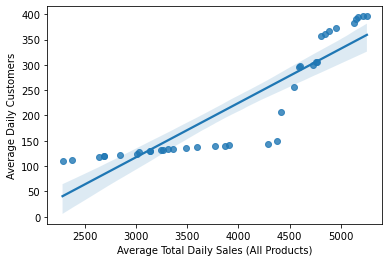

In [14]:
sns.regplot(x='Average Total Daily Sales (All Products)',y='Average Daily Customers',data=_csv_read_file_path) 

plt.show()

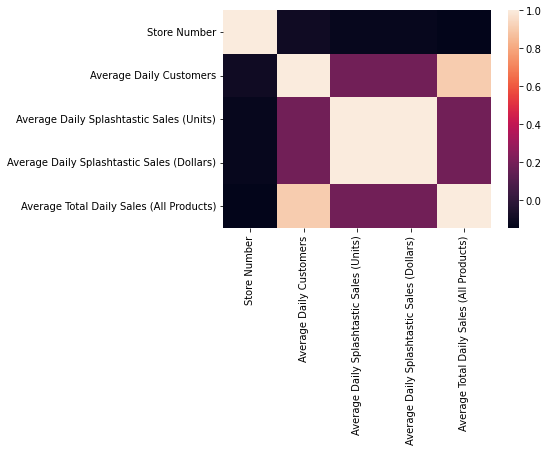

In [15]:
#determine correlation in the  dataframe  and use the approximate plot to display the corr() result

corrl_m=_csv_read_file_path.corr()
#print(corrl_m)
sns.heatmap(corrl_m)
plt.show()



In [18]:
#save cleaned dataset
_csv_read_file_path.to_csv('pharmacy_cleaned_data.csv')